In [11]:
import pandas as pd
import json
import requests
import json
from bs4 import BeautifulSoup as BS
import time
import mysql.connector
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
import config1
cnx = mysql.connector.connect(
    host = config1.host,
    user = config1.user,
    passwd = config1.password
)
cursor = cnx.cursor()


In [13]:
def get_data(school_id):
    id = school_id
    url_ex = f'http://www.ratemyprofessors.com/filter/professor/?&page=1&filter=teacherlastname_sort_s+asc&query=*%3A*&queryoption=TEACHER&queryBy=schoolId&sid={id}'
    response = requests.get(url_ex)
    data = json.loads(response.text)
    num_of_professors = data['searchResultsTotal']
    num_divided = num_of_professors / 20
    
    if isinstance(num_divided, float) == True:
        num_divided = int(num_divided + 1)
        
    professors = []    
    for i in range(1, num_divided):
        id = school_id
        url = f'http://www.ratemyprofessors.com/filter/professor/?&page={i}&filter=teacherlastname_sort_s+asc&query=*%3A*&queryoption=TEACHER&queryBy=schoolId&sid={id}'
        response = requests.get(url)
        data = json.loads(response.text)
        professors.append(data)
    new_list = []
    for i in range(len(professors)):
        prof_data = professors[i]['professors']
        new_list.append(prof_data)
    prof = []
    for i in range(len(new_list)):
        a = new_list[i]
        for j in range(len(a)):
            b = a[j]
            prof.append(b)
    
    prof_list = []
    
    for i in range(len(prof)):
            overall_rating = prof[i]['overall_rating']
            if overall_rating == 'N/A':
                continue
            else:
                school = prof[i]['institution_name']
                dept = prof[i]['tDept']
                name = prof[i]['tLname'] + ' ' + prof[i]['tFname']
                num_ratings = prof[i]['tNumRatings']
                rating = prof[i]['overall_rating']
                prof_tuple = (school, name, dept, float(rating), int(num_ratings))
                prof_list.append(prof_tuple)
    return prof_list

In [14]:
def connect_database(database, table):
    import config1
    cnx = mysql.connector.connect(
        host = config1.host,
        user = config1.user,
        passwd = config1.password
    )

    cursor = cnx.cursor()
    cursor.execute("CREATE DATABASE {} ".format(database))
    cnx.database = database
# connects to AWS server, creates cursor, creates database

In [15]:
def create_table(table):
    import config1
    cnx = mysql.connector.connect(
        host = config1.host,
        user = config1.user,
        passwd = config1.password
    )
    cursor = cnx.cursor()
    cursor.execute("CREATE TABLE {} ".format(table) +
                   "(name varchar(100) NOT NULL, department varchar(100), rating float, num_ratings int)")

In [16]:
def drop_database(database):
    import config1
    cnx = mysql.connector.connect(
        host = config1.host,
        user = config1.user,
        passwd = config1.password
    )

    cursor = cnx.cursor()
    cursor.execute("DROP DATABASE {} ".format(database))
    cnx.database = database   

In [17]:
def insert_data(table, list_name):
    statement = "INSERT INTO {}".format(table) + " (school, name, department, rating, num_ratings) VALUES (%s, %s, %s, %s, %s)"
    cursor = cnx.cursor()
    cursor.execute(statement, prof_list)
    cnx.commit()

In [18]:
prof_list = get_data(758)

In [20]:
statement = "INSERT INTO rate_my_prof.prof (school, name, department, rating, rating_count) VALUES (%s, %s, %s, %s, %s)"
cursor = cnx.cursor()
cursor.executemany(statement, prof_list)
cnx.commit()

In [21]:
statement = "INSERT INTO rate_my_prof.SUNY_Geneseo (name, department, rating, num_ratings) VALUES (%s, %s, %s, %s)"
cursor = cnx.cursor()
cursor.executemany(statement, prof_list)
cnx.commit()

InterfaceError: Failed executing the operation; Not all parameters were used in the SQL statement

In [ ]:
import pandas as pd
df = pd.read_csv('rate_my_professor')
x = df['num_ratings'][:20]
y = df['rating'][:20]

In [ ]:
#Biggest School in Each State
school_list =[4282,1256,1166,1530,352,1320,135,1003,1385,914,1309,1266,758,775,1596,724,1358,685,960,1058,1061,45,1391,1075,1087,1091,1094,1082,1101,1106,120,1112,440,1115,1117,1118,3071,1122,1270,1513,601,1257,617,1321,626,1249,1264,1231,825,1610]


In [ ]:
df=pd.DataFrame(prof_list)

In [ ]:
df=df.rename(columns={0: "School", 1: "Professor", 2: "Department", 3:"Rating", 4:"Rating Count"})

In [ ]:
pd.set_option('display.max_rows', 1000)

In [ ]:
df_ratings = pd.DataFrame(df.groupby(['Department'])['Rating'].mean())

In [ ]:
df_rating_counts = pd.DataFrame(df.groupby(['Department'])['Rating Count'].sum())

In [ ]:
df_rating_counts

In [ ]:
df_total = pd.merge(df_ratings, df_rating_counts, on='Department')

In [ ]:
df_total.shape

In [ ]:
updates = [{'Department':'Classical & Medieval Studies', 'Rating': 4.4821471041756356, 'Rating Count': 66},
           {'Department': 'African Studies', 'Rating': 3.8477987579579627, 'Rating Count': 212},
           {'Department':'Biology', 'Rating': 3.5424170101403556, 'Rating Count': 2682},
           {'Department':'Curriculum Instruction', 'Rating': 4.116825408405727, 'Rating Count': 30},
           {'Department':'Engineering Mechanics', 'Rating': 3.5782609236413156, 'Rating Count': 46},
           {'Department':'Hotel & Restaurant Management', 'Rating': 3.841666678003713, 'Rating Count': 245},
           {'Department':'Information Science Tech', 'Rating': 3.4685114030796003, 'Rating Count': 1362},
           {'Department':'Labor Employment Relations', 'Rating': 3.9464963271008227, 'Rating Count': 246},
           {'Department':'Landscape Architecture & Regional Planning', 'Rating': 3.57796050333663, 'Rating Count': 95},
           {'Department':'Recreation, Parks, & Tourism', 'Rating': 3.9977112855862407, 'Rating Count': 142}
          ]

In [ ]:
df_updates = pd.DataFrame(updates)

In [ ]:
df_updates = df_updates.set_index('Department')

In [ ]:
df_total = df_total.drop(['Classical  Medieval Studies','Biological Sciences', 'Biology','Classical & Medieval Studies','Classical amp Medieval Studies', 'Curriculum  Instruction', 'Curriculum amp Instruction', 'Ecosystem Science  Management', 'Ecosystem Science & Management', 'Engineering Science  Mechanics', 'Engineering Science amp Mechanics', 'Engineering, Science, & Mechanics', 'Hotel  Restaurant Management', 'Hotel & Restaurant Management', 'Hotel amp Restaurant Management', 'Information Sciences  Technology', 'Information Sciences & Technology', 'Information Science', 'Information Sciences amp Technology', 'Labor  Employment Relations', 'Labor & Employment Relations','Labor amp Employment Relations', 'Landscape Architecture  Regional Planning', 'Landscape Architecture & Regional Planning', 'Recreation Parks  Tourism', 'Recreation Parks amp Tourism', 'Recreation, Parks, & Tourism', 'African-American Studies', 'Africana Studies'])


In [ ]:
df_total.shape

In [ ]:
df_updates.shape

In [ ]:
frames1=[df_total,df_updates]

In [ ]:
df_total_updated = pd.concat(frames1)

In [ ]:
list = []
for i in range(0,127):
    index = i
    list.append(index)


In [ ]:
df_total_updated = df_total_updated.reset_index()


In [ ]:
df_total_updated = df_total_updated.drop(columns=['level_0', 'index'])

In [ ]:
df_total_updated['Department'][0]

In [ ]:
new_list = []
for i in range(len(df_total_updated)):
    dept = df_total_updated['Department'][i]
    rating = df_total_updated['Rating'][i]
    rating_count = df_total_updated['Rating Count'][i]
    tup = (dept, rating, int(rating_count))
    new_list.append(tup)

In [ ]:
statement = "INSERT INTO rate_my_prof.new_penn (department, rating, rating_count) VALUES (%s, %s, %s)"
cursor = cnx.cursor()
cursor.executemany(statement, penn_list)
cnx.commit()

In [ ]:
rating_count = pd.read_csv('rating_count')
rating_count

In [ ]:
import pandas as pd
new_list = pd.read_csv('new_list')
average = 3.6918399999999907


In [284]:
one = new_list['rating'][0:10]
two = new_list['rating'][10:20]
three = new_list['rating'][20:30]
pop = new_list['rating_count']

In [280]:
ttest_ind(three, pop, equal_var = False)

Ttest_indResult(statistic=-1.8450454631179052, pvalue=0.09777030704050818)

In [215]:
one_var = np.std(one) **2
two_var = np.std(two) **2
three_var = np.std(three) **2
four_var = np.std(four) **2
pop_var = np.std(pop) **2

In [216]:
one_mean = np.mean(one)
two_mean = np.mean(two)
three_mean = np.mean(three)
four_mean = np.mean(four)
pop_mean = np.mean(pop)

In [225]:
welsh = (three_mean - pop_mean) / np.sqrt(((three_var/10) + (pop_var/5000)))

In [226]:
welsh

-1.9442752537386485

In [202]:
one = -1.063513717765608
two = -0.35803700124184945
three = -1.9442752537386485
four = 0.3169168599410574

-0.5147275276843895

In [110]:
new_list['rating'].describe()

z_list = []
elements = []
for i in range(0,100):
    z_score = (new_list['rating'][i] - new_list['rating'].mean())/1.039437
    z_list.append(z_score)


In [131]:
ten

[-0.28076737695501586,
 0.007850403631975283,
 0.296468184218966,
 -0.08835552323035509,
 -0.8580029381289976,
 0.6812918916682874,
 -1.1466207187159883,
 0.296468184218966,
 -1.2428266455783188,
 0.4888800379436267]

In [111]:
one = z_list[0:10]
two = z_list[10:20]
three = z_list[20:30]
four = z_list[30:40]
ten = z_list[90:100]

In [159]:
difference = np.subtract(one, four)
n=10

In [160]:
sum_difference = np.sum(difference)

In [161]:
squared = np.square(difference)
sum_of_squared = np.sum(squared)

In [162]:
numerator_1 = sum_difference/n


In [163]:
denominator_1 = sum_of_squared - (((sum_difference)**2)/n)

In [164]:
denominator_2 = (n-1)*(n)

In [165]:
num_2 = numerator_1/denominator_1

In [166]:
t_score = num_2/denominator_2

In [168]:
t_score

-0.0002441440809968846

In [57]:
one_two = -0.0002159901148811115
two_three = 0.0001787919844045639
three_four = -0.0007694869775893396

[-0.6655910844043369,
 0.7774978185306174,
 0.6812918916682874,
 0.2002622573566356,
 -0.6655910844043369,
 1.0661155991176081,
 -0.6655910844043369,
 -0.8580029381289976,
 0.7774978185306174,
 -1.6276503530276398]

In [58]:
three

[0.296468184218966,
 -0.6655910844043369,
 -0.37697330381734623,
 -0.28076737695501586,
 0.296468184218966,
 -1.050414791853658,
 -1.050414791853658,
 -0.9542088649913276,
 -0.47317923067967615,
 0.6812918916682874]

In [59]:
four

[0.10405633049430522,
 -0.37697330381734623,
 0.6812918916682874,
 -1.5314444261653093,
 0.7774978185306174,
 0.4888800379436267,
 0.296468184218966,
 -0.18456145009268546,
 -0.18456145009268546,
 0.5850859648059566]

In [50]:
outliers = []
for i in four:
    if i <= -1.6 or i >= 1.6:
        outliers.append(i)
outliers

[]

In [ ]:
z_list1 = []
for i in range(1000,1010):
    z_score = (new_list['rating'][i] - new_list['rating'].mean())/1.039437
    z_list1.append(z_score)
z_list1


Text(0.5, 1.0, 'Rating Distributions')

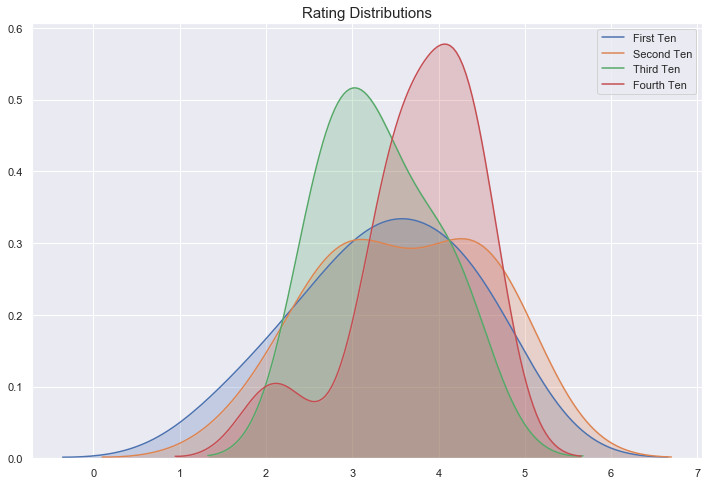

In [263]:
import seaborn as sns
plt.style.use('ggplot')
sns.set(rc={'figure.figsize':(12,8)})
sns.kdeplot(one, shade = True, label = 'First Ten')
sns.kdeplot(two, shade = True, label = 'Second Ten')
sns.kdeplot(three, shade = True, label = 'Third Ten')
sns.kdeplot(four, shade = True, label = 'Fourth Ten')
ax = plt.gca()
ax.set_title("Rating Distributions", fontsize=15)

In [ ]:
new_list['rating'][2]

(array([130.,   0.,   0.,   0.,   0.,  15.,   0.,  18.,   0.,   0.,  10.,
          0.,  40.,   0.,   0.,  23.,   0.,  21.,   0.,   0.,  29.,   0.,
         33.,   0.,   0., 139.,   0.,  41.,   0.,   0.,  60.,   0.,  76.,
          0.,  45.,   0.,   0., 124.,   0.,   0.,  54.,   0.,  80.,   0.,
          0., 107.,   0.,  67.,   0.,   0., 255.,   0.,  79.,   0.,   0.,
        121.,   0., 109.,   0.,   0.,  95.,   0., 197.,   0.,   0., 128.,
          0., 130.,   0., 183.,   0.,   0., 124.,   0.,   0., 399.,   0.,
        103.,   0.,   0., 190.,   0., 197.,   0.,   0., 123.,   0., 279.,
          0.,   0., 117.,   0., 151.,   0., 217.,   0.,   0.,  75.,   0.,
        616.]),
 array([1.  , 1.04, 1.08, 1.12, 1.16, 1.2 , 1.24, 1.28, 1.32, 1.36, 1.4 ,
        1.44, 1.48, 1.52, 1.56, 1.6 , 1.64, 1.68, 1.72, 1.76, 1.8 , 1.84,
        1.88, 1.92, 1.96, 2.  , 2.04, 2.08, 2.12, 2.16, 2.2 , 2.24, 2.28,
        2.32, 2.36, 2.4 , 2.44, 2.48, 2.52, 2.56, 2.6 , 2.64, 2.68, 2.72,
        2.76, 2.8 , 2.

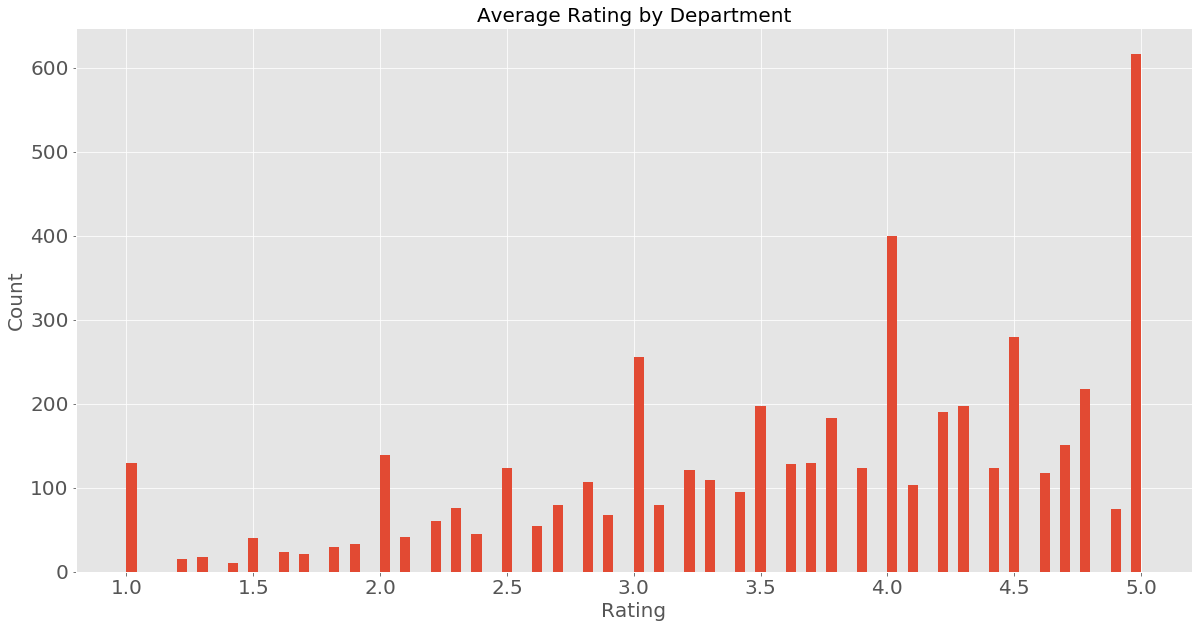

In [74]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(20,10))
plt.tick_params(labelsize = 20)
plt.xlabel('Rating', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Average Rating by Department', fontsize=20)
plt.hist(new_list['rating'], bins=100)

In [136]:
len(rating_count)

127

In [114]:
penn_list = []
for i in range(len(df_total_updated)):
    dept = df_total_updated['Department'][i]
    rating = df_total_updated['Rating'][i]
    rating_count = df_total_updated['Rating Count'][i]
    penn_tuple = (dept, rating, int(rating_count))
    penn_list.append(penn_tuple)

In [103]:
penn_list

[('Accounting', 3.6210526315789475, 1034),
 ('Actuarial Science', 3.6, 19),
 ('Aerospace Engineering', 3.463636363636363, 127),
 ('Agriculture', 3.909803921568627, 331),
 ('Animal Science', 3.5611111111111122, 156),
 ('Anthropology', 3.419565217391303, 578),
 ('Arabic', 4.5, 22),
 ('Architectural Engineering', 4.0, 2),
 ('Architecture', 3.5777777777777775, 265),
 ('Art', 3.608510638297872, 305),
 ('Art Education', 3.425, 23),
 ('Art History', 3.62, 468),
 ('Astronomy', 3.4684210526315784, 763),
 ('Behavioral Sciences', 3.5526315789473686, 350),
 ('Biochemistry', 3.43076923076923, 157),
 ('Bioethics', 4.5, 5),
 ('Broadcasting', 4.9, 10),
 ('Business', 3.7702702702702724, 2028),
 ('Business Law', 3.0, 55),
 ('Chemical Engineering', 2.9920000000000004, 281),
 ('Chemistry', 3.588607594936709, 2301),
 ('Chinese', 3.7933333333333334, 86),
 ('Civil Engineering', 3.945945945945946, 175),
 ('Classics', 3.99375, 290),
 ('Communication', 3.9160493827160465, 3681),
 ('Communication Arts', 3.773999

<BarContainer object of 5000 artists>

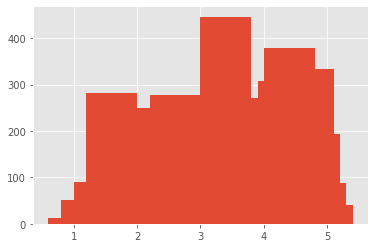

In [154]:
import matplotlib.pyplot as plt
%matplotlib inline
x = new_list['rating']
y = new_list['rating_count']
plt.bar(x,y)

In [142]:
rating_count['rating'].mean()

3.757618031496064

In [81]:
df_total_updated['Rating Count'].describe()
# tells us that 50% fall under 163 reviews, 25% fall over 454 reviews, and the average review 
# count is 514.
# welsh's t-test

count     127.000000
mean      514.062992
std       949.374144
min         1.000000
25%        51.500000
50%       163.000000
75%       454.500000
max      6213.000000
Name: Rating Count, dtype: float64

In [80]:
fifty_schools = pd.read_csv('50_Schools_Data.csv')

In [97]:
fifty_schools = fifty_schools.drop(columns=['Unnamed: 0'])

In [100]:

import numpy as np
import pandas as pd
import scipy

import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [103]:
fifty_schools['Rating'].mean()


3.733797550770954

In [1]:
foreign_z = []
for i in range(0,50):
    z = foreign['rating'][i] - new_list['rating'].mean() / 1.039437
    foreign_z.append(z)


NameError: name 'foreign' is not defined

In [175]:
foreign_outliers = []
for i in foreign_z:
    if i <=-1.6:
        foreign_outliers.append(i)
    if i >=1.6:
        foreign_outliers.append(i)
foreign_outliers
        

[-2.2517688902742456, -1.6517688902742456]

In [294]:
from scipy.stats import ttest_ind
ttest_ind(foreign2['rating_count'], new_list_2['rating_count'], equal_var = False)

Ttest_indResult(statistic=4.244796698035968, pvalue=9.64602565598559e-05)

In [178]:
foreign_1 = foreign['rating_count'].reset_index()

In [172]:
summation = []
for i in range(0,49):
    form = (foreign_1['rating_count'][i] - foreign_1['rating_count'].mean())**2
    summation.append(form)
value = sum(summation)
variance = value / 48

NameError: name 'foreign_1' is not defined

In [217]:
variance

406.7823129251701

In [169]:
for i in range(0,50):
    form = (foreign['rating'].mean() - 13.0418)/variance
form    

NameError: name 'foreign' is not defined

In [181]:
new_list1 = new_list.drop([0])

In [182]:
foreign1 = foreign.drop([43])

In [183]:
new_list_2 = new_list1.reset_index()
foreign2 = foreign1.reset_index()

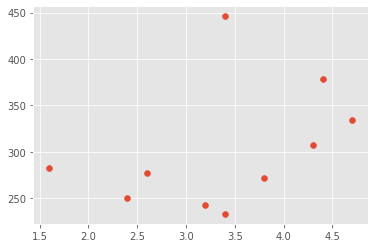

In [261]:
x = new_list['rating'].head(10)
y = new_list['rating_count'].head(10)
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x, y)

Text(0.5, 1.0, 'Rating Distributions')

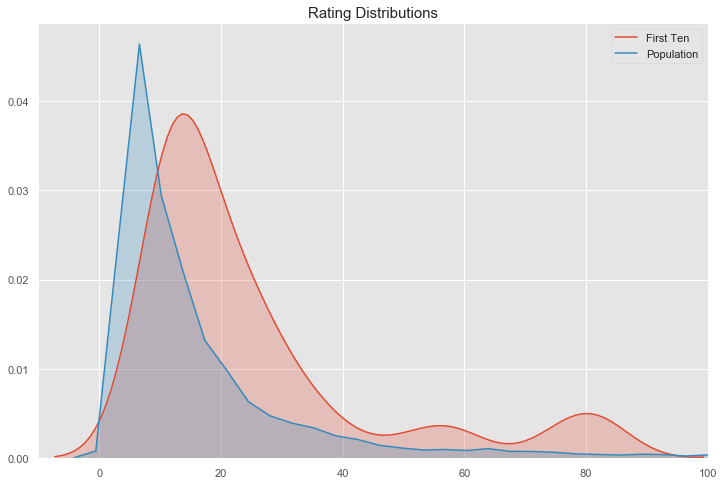

In [288]:
import seaborn as sns
plt.style.use('ggplot')
sns.kdeplot(foreign2['rating_count'], shade = True, label = 'First Ten')
sns.kdeplot(pop, shade = True, label = 'Population')
ax = plt.gca()
plt.xlim(-10, 100)
ax.set_title("Rating Distributions", fontsize=15)

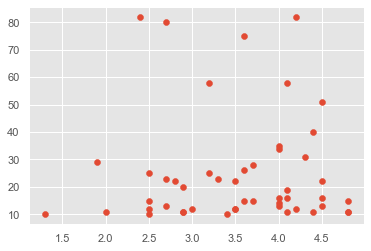

In [292]:
x = foreign2['rating']
y = foreign2['rating_count']
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x, y)